<a href="https://colab.research.google.com/github/sdxvamp2/weatherwise-sayed/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 126.4 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found exist

In [3]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')
# 37f1304bd6b0404eaf43c2a85e90308a.Sd5-TJ6KS6PvhxD-uL6HoANZ

Enter your API key: 37f1304bd6b0404eaf43c2a85e90308a.Sd5-TJ6KS6PvhxD-uL6HoANZ


## 📦 Setup and Configuration
Import required packages and setup environment.

In [4]:
!pip install pyinputplus
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=28fb838a47d78e041fe87d205cb86d2272580397ffeb5c29bfd02b845a0b517a
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=ef69af8320a5a4db829f05a2bd990f435d0014328b2c6596b1c2225c076a4468
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

## 🌤️ Weather Data Functions

In [5]:
import requests

def get_weather_data(location, forecast_days=5):


    if forecast_days < 1 or forecast_days > 5:
        forecast_days = 3

    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        current = data.get("current_condition", [{}])[0]
        forecast = data.get("weather", [])[:forecast_days]

        weather_info = {
            "location": location,
            "current": {
                "temp_C": current.get("temp_C"),
                "humidity": current.get("humidity"),
                "description": current.get("weatherDesc", [{}])[0].get("value"),
            },
            "forecast": []
        }

        for day in forecast:
            weather_info["forecast"].append({
                "date": day.get("date"),
                "avgtempC": day.get("avgtempC"),
                "maxtempC": day.get("maxtempC"),
                "mintempC": day.get("mintempC"),
                "sunrise": day.get("astronomy", [{}])[0].get("sunrise"),
                "sunset": day.get("astronomy", [{}])[0].get("sunset"),
            })

        return weather_info

    except requests.RequestException as e:
        return {"error": f"Unable to fetch weather data: {e}"}

## 📊 Visualisation Functions

In [6]:
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='scatter'):
    """
    Create a scatter plot for maximum and minimum temperatures over forecast days.

    Args:
        weather_data (dict): Weather data returned from get_weather_data()
        output_type (str): Type of chart to produce ('scatter' or 'line')

    Returns:
        str: Success message once plot is shown or saved.
    """

    if "error" in weather_data:
        print(weather_data["error"])
        return

    dates = [day['date'] for day in weather_data['forecast']]
    max_temps = [float(day['maxtempC']) for day in weather_data['forecast']]
    min_temps = [float(day['mintempC']) for day in weather_data['forecast']]

    plt.figure(figsize=(8, 5))
    plt.title(f"Temperature Forecast for {weather_data['location'].title()}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")

    if output_type == 'scatter':
        # Scatter plot for max and min temps
        plt.scatter(dates, max_temps, color='red', label='Max Temp')
        plt.scatter(dates, min_temps, color='blue', label='Min Temp')
    else:
        # Optional: fallback to line plot if user wants
        plt.plot(dates, max_temps, 'r-o', label='Max Temp')
        plt.plot(dates, min_temps, 'b-o', label='Min Temp')

    # Add data labels (optional, can comment out if too crowded)
    for i, txt in enumerate(max_temps):
        plt.text(dates[i], max_temps[i] + 0.5, f"{txt}°", ha='center', fontsize=8, color='red')
    for i, txt in enumerate(min_temps):
        plt.text(dates[i], min_temps[i] - 1, f"{txt}°", ha='center', fontsize=8, color='blue')

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



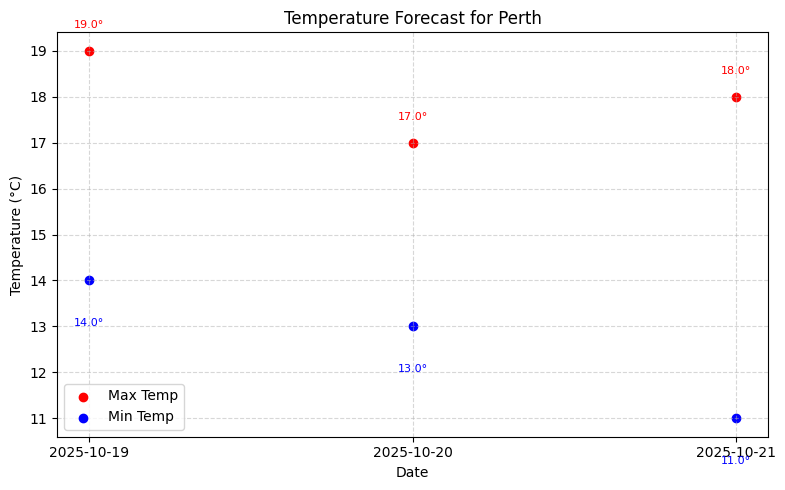

None


In [ ]:
weather_data = get_weather_data('perth', 3)
print(create_temperature_visualisation(weather_data))

In [7]:

import numpy as np

def create_precipitation_visualisation(weather_data, output_type='display'):

    forecast = weather_data.get("forecast", [])
    if not forecast:
        print("No forecast data available to visualise.")
        return None

    # Extract values
    dates = [day.get("date") for day in forecast]
    rainfall = [float(day.get("totalprecipMM", 0)) for day in forecast]   # total precipitation in mm
    chance_of_rain = [
        float(day.get("hourly", [{}])[0].get("chanceofrain", 0)) if "hourly" in day else 0
        for day in forecast
    ]

    x = np.arange(len(dates))

    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Bar chart for rainfall
    bars = ax1.bar(x, rainfall, color="skyblue", label="Rainfall (mm)")
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Rainfall (mm)", color="blue", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_xticks(x)
    ax1.set_xticklabels(dates, rotation=30, ha="right")

    # Secondary axis for chance of rain
    ax2 = ax1.twinx()
    ax2.plot(x, chance_of_rain, color="darkred", marker="o", linewidth=2, label="Chance of Rain (%)")
    ax2.set_ylabel("Chance of Rain (%)", color="darkred", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="darkred")

    # Title and legend
    fig.suptitle(f"Precipitation Forecast for {weather_data.get('location', 'Unknown')}", fontsize=14, weight="bold")

    # Combine legends from both axes
    bars_legend, labels1 = ax1.get_legend_handles_labels()
    line_legend, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(bars_legend + line_legend, labels1 + labels2, loc="upper left")

    fig.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


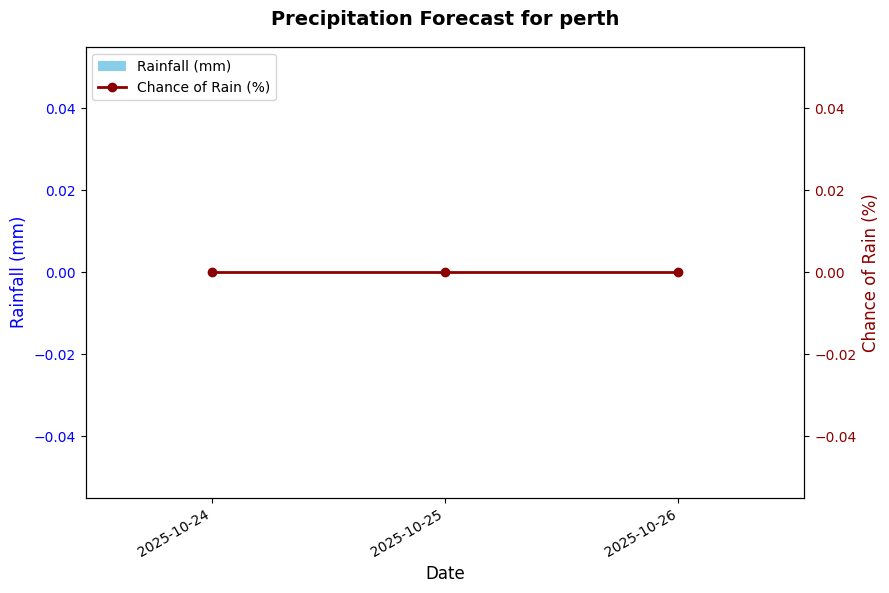

None


In [8]:
weather_data = get_weather_data('perth', 3)
print(create_precipitation_visualisation(weather_data))

## 🤖 Natural Language Processing

In [9]:
import re
import datetime
def parse_weather_question(question):
    question = question.lower()

    # Detect attribute
    if "rain" in question or "precipitation" in question:
        attribute = "precipitation"
    elif "temperature" in question or "hot" in question or "cold" in question:
        attribute = "temperature"
    else:
        attribute = "general"

    # Detect time → map to days_ahead
    if "today" in question:
        days_ahead = 0
    elif "tomorrow" in question:
        days_ahead = 1
    elif "day after tomorrow" in question:
        days_ahead = 2
    else:
        days_ahead = 0  # fallback

    # Remove keywords to extract location
    location = (question.replace("today", "")
                        .replace("tomorrow", "")
                        .replace("day after tomorrow", "")
                        .replace("rain", "")
                        .replace("precipitation", "")
                        .replace("temperature", "")
                        .replace("in", "")
                        .strip().title())

    return {
        "location": location,
        "days_ahead": days_ahead,
        "attribute": attribute
    }


## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [10]:
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    location = parsed_question["location"]
    attribute = parsed_question["attribute"]
    days_ahead = parsed_question["days_ahead"]

    forecast = weather_data.get("forecast", [])
    if days_ahead >= len(forecast):
        return f"Sorry, I only have forecast data for {len(forecast)} days ahead."

    if days_ahead == 0:
        target_day = "today"
    elif days_ahead == 1:
        target_day = "tomorrow"
    else:
        target_day = f"in {days_ahead} days"

    day_data = forecast[days_ahead]

    if attribute == "temperature":
        print(create_temperature_visualisation(weather_data))
        return (f"The forecasted temperature {target_day} in {location} is "
                f"{day_data['mintempC']}°C - {day_data['maxtempC']}°C "
                f"(average {day_data['avgtempC']}°C).")

    elif attribute == "precipitation":
        print(create_precipitation_visualisation(weather_data))
        total_precip = sum(float(h.get("precipMM", 0)) for h in day_data["hourly"])
        return (f"The total expected rainfall {target_day} in {location} "
                f"is {total_precip:.1f} mm.")
    elif attribute == "humidity":
        avg_humidity = sum(int(h.get("humidity", 0)) for h in day_data["hourly"]) / len(day_data["hourly"])
        return (f"The average humidity {target_day} in {location} will be about {avg_humidity:.0f}%.")
    elif attribute == "wind":
        avg_wind = sum(int(h.get("windspeedKmph", 0)) for h in day_data["hourly"]) / len(day_data["hourly"])
        return (f"The average wind speed {target_day} in {location} will be about {avg_wind:.0f} km/h.")
    else:
        return f"Sorry, I couldn't understand the weather attribute in your question."


## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.